# conceptos aprendidos  
- como cargar y usar un modelo ya entrenado (InceptionV3())
-  peparar para suministrar una imagen propia al modleo 
-  manejar el input y el output que sale de cada capa del modelo
-  como visualizar la probabilidad de que una imagen dada de input pertenezca a una clase x (ejemplo: calcular la probavilidad de que una imagen input = buho sea un limon ) con esta linea de codigo visualizamos la probailidad loss = out_layer[0, target_class]
- como crear un gradiente para que apartir de un error inputado (loss= la probabilidad de que la imagen dada sea un limon) se calcule una optimizacion de un array, este array podria ser una array de parametros W-b o un array que contiene una imagen     
grad = K.gradients(loss, inp_layer)[0]
- como crear una funcion de keras en la cual le indicaremos que le vamso a dar de input [inp_layer, K.learning_phase()] y que es lo que queremos de output [grad, loss], practicamente la funcion usara el modelo que instanciamos, para meterle por la clase input nuestroa imagen, y para que por la clase loss, la probailidad de que nuestra imagen sea un limon     
optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])
- en vez de minimizar el error lo maximizaremos sumando el gradiente en vez de restarlo 
  gr, cost = optimize_gradient([adv, 0])
  adv += gr
- entender que la imagen que manipula la red ser administrada en forma de array    
x = image.img_to_array(image.load_img("./drive/MyDrive/Colab Notebooks/nuevo dotcsv/img/buho.jpg", target_size = (299, 299)))    
con una dimencion extra del batch (299, 299, 3) > (1, 299, 299, 3)     
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])    
debe estar normalizada y    
x = preprocess_input(x)   - 0-255 a -1 > 1 como lo pide el modelo    
 y para poder plotearla tienes que hacer el proceso inverso     
copy_adv = ((copy_adv * 255)/2) + (255/2)    
plt.imshow(copy_adv[0].astype(np.uint8))     

# funciones nuevas 
- agregamos un clip que seria como un rango min-max de perturbacion lo que dice es modifica la imagen pero no te pasese de este rango 
  adv = np.clip(adv, min_per, max_per)
- definir un valor de error a apartir de una probabilidad de que el outut sea una categoria 
loss = v3.layers[-1].output[0, target_class]
- crear un gradiente para optimizar un array con las dimesiones de la capa del input del modelo
grad = K.gradients(loss, iv3.layers[0].input)[0]
crear un funcion de keras para que en base a una imagen de entrada nos regrese un gradiente para optimizar el input d ela primera capa (la imagen) y la probabilidad de que la imagen pertenezca a la clase 955 (loss)
optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])
gr, cost = optimize_gradient([adv, 0])

In [ ]:
import tensorflow as tf
import keras 

import matplotlib.pyplot as plt
import numpy as np

tf.compat.v1.disable_eager_execution()



In [ ]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras import backend as K

In [ ]:
iv3 = InceptionV3()

Instructions for updating:
Colocations handled automatically by placer.
96124928/96112376 [==============================] - 2s 0us/step


In [ ]:
from numpy.core.fromnumeric import reshape # esta importacion no la hice pero se colab la creo cuando use el metodo reshape 
from keras.preprocessing import image



In [ ]:
# el parametro target size permite reducir el tamalo de la imagen 
x = image.img_to_array(image.load_img("./drive/MyDrive/Colab Notebooks/nuevo dotcsv/img/buho.jpg", target_size = (299, 299)))
print(x.shape)
print(x[0][0][0])
# devido a que el programa recibe por default un tensor con esta forma [lote_ de_imagenes[imgen[pixel[RGV[]]]]] 
# pero lo tenemos asi imgen[pixel[RGV[]]], por lo tanto necesitamos una caja que englobe a la imagen esto se hace con reshape 
# aumentamos una dimencion al vector para indicar el batch size
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])



print(x.shape)
print(x[0][0][0])
# usamos la funcion de preprosesamiento y evitamos hacer calulos para pasar el rango de los pixeles de 0-255 a -1 > 1 como lo pide el modelo 
x = preprocess_input(x)

y = iv3.predict(x)
decode_predictions(y)

(299, 299, 3)
251.0
(1, 299, 299, 3)
[251. 245. 245.]


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


49152/35363 [=========================================] - 0s 0us/step


[[('n01622779', 'great_grey_owl', 0.9033185),
  ('n01514859', 'hen', 0.0019317678),
  ('n01798484', 'prairie_chicken', 0.001440915),
  ('n01806143', 'peacock', 0.0014145486),
  ('n04074963', 'remote_control', 0.0010339726)]]

# si no sabes moverte en entre directorios usa la libreria os y este simple turtorial para saber

https://blog.facialix.com/automatizando-tareas-en-python-operaciones-con-archivos-y-carpetas-usando-el-modulo-os/

In [ ]:
# importando el modulo os podemos teclear comandos de terminal y de esta saber por ejemplo en que directorio nos encontramos 
import os
os.getcwd()

'/content'

# ataque adversario 

## tuvimos un error con el comando grad = K.gradients(loss, inp_layer)[0] 
buscamos en internet y obtuvimos esto 
You have two options too resolve this error:

.gradients is drepracted in TF2 - Replace gradients with GradientTape as suggested here https://github.com/tensorflow/tensorflow/issues/33135

Simply disable the eager-execution constrain form tf2 with the compat mode for tf1

Example running code for solution 2:

tf.compat.v1.disable_eager_execution()

https://stackoverflow.com/questions/66221788/tf-gradients-is-not-supported-when-eager-execution-is-enabled-use-tf-gradientta

yo utilice la opcion 2 asi que puse una linea de codigo "tf.compat.v1.disable_eager_execution()" al inicoo y volvi a cargar todas las celdas 

In [ ]:
# sacamos el nodo o capa por donde entran y salen los datos. 
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

# colocamos la clase objetivo a la que querramos que confunda 
target_class = 951 

#creamos una funcion de coste que indique el elemento que queremos maximizar
# con esto fijamos el resultado a la clase 950 y por lo tanto nos dira 
# que tanto se parece el input a la clase 95, nos regresara un numero de probabilidad
# como tal loss no contiene un numero si no una clase de TF a la cual llegara la probavilidad de que un input se parezca a la clase 951
loss = out_layer[0, target_class]
print(loss)

""" 
cuando entrenamos una NN queremos encontrar el gradiente entre nuestro error y los parametros  
el gradiente que nos dara los valores que necesitamos para minimizar el error 
esto calulara el gradiente entre el error y la variable entrada
gradient contendra la direccion hacia donde tenemso que movernos para minimizar el error
es un tensor con numeros que indicaran cuanto debemos variar los pixeles para minimizar 
"""

grad = K.gradients(loss, inp_layer)[0]

"""
cremos la funcion para que se ejecute iteratibamente la funcion del gradiente 
sera una funcion tipo keras que se le da los valores de entrada y los valores esperados 
asi creara una funcion  que ejecutara todo el grafo para realizar esta accion.

practicamente lo que hace es pasar nuestra imagen adv por la primera capa y saldra 
en cost la probavilidad de que la imagen de entrada sea la clase 950 
"""
optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])
# creamos el grado maximo de perturbacion para que la modificacion sea inperceptible al ojo 
per = 0.01
max_per = x + per
min_per = x - per 

# creamos una copia de la variable x para no perder los datos cargados cuando se meta al bucle 
adv = np.copy(x)
# creamos el bucle iterativo 
cost = 0.0
epoch = 0
while cost < 0.95: 
  # guardamos el gradiente de cada iteracion, el 0 (modo testing) es para el k.learningphase
  # recordemos que en la funcion pedimos que nos de como outpput el gradiente y coste de cada iteracion 
  gr, cost = optimize_gradient([adv, 0])
  # le sumamos el gradiente a nuestra imagen en vez de restarle 
  adv += gr
  # agregamos un clip que seria como un rango min-max de perturbacion 
  # lo que dice es modifica la imagen pero no te pasese de este rango 
  adv = np.clip(adv, min_per, max_per)
  # acotacion del valor de las intensidades entre  -1 a 1  
  adv = np.clip(adv, -1, 1)
  epoch += 1
  print("target costa: ", cost, " epoch: ", epoch)
copy_adv = np.copy(adv)

Tensor("strided_slice_4:0", shape=(), dtype=float32)
target costa:  7.8393474e-05  epoch:  1
target costa:  7.846923e-05  epoch:  2
target costa:  7.85452e-05  epoch:  3
target costa:  7.862103e-05  epoch:  4
target costa:  7.8696896e-05  epoch:  5
target costa:  7.877275e-05  epoch:  6
target costa:  7.884897e-05  epoch:  7
target costa:  7.8925106e-05  epoch:  8
target costa:  7.900068e-05  epoch:  9
target costa:  7.907708e-05  epoch:  10
target costa:  7.915365e-05  epoch:  11
target costa:  7.923063e-05  epoch:  12
target costa:  7.9307356e-05  epoch:  13
target costa:  7.9384656e-05  epoch:  14
target costa:  7.9461715e-05  epoch:  15
target costa:  7.953888e-05  epoch:  16
target costa:  7.9616526e-05  epoch:  17
target costa:  7.969389e-05  epoch:  18
target costa:  7.977141e-05  epoch:  19
target costa:  7.984886e-05  epoch:  20
target costa:  7.992672e-05  epoch:  21
target costa:  8.0004414e-05  epoch:  22
target costa:  8.008208e-05  epoch:  23
target costa:  8.016022e-05  

# se logro crear la imagen adversaria despues de: 
target costa:  0.9502477  
epoch:  2498   
tardo 30min 

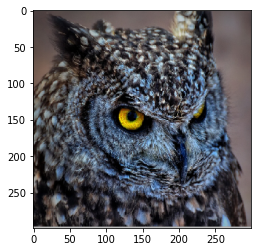

In [ ]:
# imprimimos la foto original 
imag = np.copy(x)

imag = ((imag * 255)/2) + (255/2)
"""imag /= 2
imag += 0.5
imag *= 255"""
# indicamos que el lote de imagenes entre a la primera imagen 
# nustros numeros pasaron de int a float y tenemos que regresar a float 
plt.imshow(imag[0].astype(np.uint8))
plt.show()

In [ ]:
from PIL import Image

copy_adv = ((copy_adv * 255)/2) + (255/2)
img_s = Image.fromarray(copy_adv[0].astype(np.uint8))
img_s.save("./drive/MyDrive/Colab Notebooks/nuevo dotcsv/img/buho_adv.png")

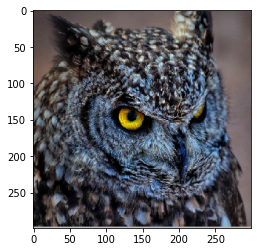

In [ ]:
# imprimimos la imgaen adversaria obtenida fue esta (buho_adv.png)
# la funcion astype funciona para pasar los numero a racionales y el np.unit8 indica el numero de decimales a considerar 
plt.imshow(copy_adv[0].astype(np.uint8))
plt.show()


In [ ]:
z = image.img_to_array(image.load_img("./drive/MyDrive/Colab Notebooks/nuevo dotcsv/img/buho_adv.png", target_size = (299, 299)))

z = z.reshape(1, z.shape[0], z.shape[1], z.shape[2])
z = preprocess_input(z)
# probamos si logramos engañar la red 
ab = iv3.predict(z)
decode_predictions(ab)

[[('n07749582', 'lemon', 0.97857684),
  ('n07753113', 'fig', 0.0012240268),
  ('n07747607', 'orange', 0.0009397473),
  ('n03991062', 'pot', 0.0005914966),
  ('n03950228', 'pitcher', 0.0005723152)]]

In [ ]:
#help(inp_layer)
# help(iv3.layers)
# por si no sabes que parametros lleva la funcion clip 
# np.clip?

In [ ]:
help(keras.applications.inception_v3)

# apuntes tomados del primer colab que hice 
# la funcion mas importante cuando trabajes con un modelo es help()   
siempre que no sepas que modulos o modelos tiene una libreria, usa la funcion <b>help()</b> de python la cual tedara informacion sobre cualquier seccion de un modulo o una libreria, o una funcion, por ejemplo.  
* help(keras): te dara informacion sobre la libreria keras 
* help(keras.applications): te dara informacion sobre los modulos de aplicaciones 
* help(keras.applications.inception_v3): te dara informacion sobre el modulo y los metodos o funciones del modulo. por ejemplo ahi daria que el modulo contiene 
## otra forma de obtener informacion es poniendo un signo "?" al final de una funcion 
por ejemplo si queremos usar la funcion clip de numpy solo falta que pongamos:   
np.clip?

# importando librerias, importando modulos o modelos 
para importar una libreria que se encuentra previamente descargada en el entorno de desarrollo usamos:    
import tensorflow    
import keras as kr   
para importar un modulo de una libreria usamos:   
from keras.applications.inception_v3 import InceptionV3, decode_predictions

## cargar el modelo inception v3 ya entrenado
ahora cargamos el modelo, para eso la funcion "inception_v3" es la que nos permitira cargar el modelo dentro de una variable este paso requiere acceso a internet para descargar datos del modelo
### cargamos decode_predictions
modulo de keras para interpretaer el tensor de salida enuna etiqueta de objetos. este paso requiere descargas de internet 

## importacion de librerias 
como nos damos cuenta tenemos que ir exportando libreria por libreria, y al final tenemos que exportar los modulos que queremos utilizar de la libreria, despues podemos importar las funciones de los modulos. +

#  como utilizar el modelo inception V3
## cargando una imagen
utilizaremos libreirias de keras para cargar la imagen el modulo  <b> image </b> utilzaremos el metodo <b> image.load_img </b>
    Como lo que qeuremos no es trabjar con un fichero tipo imgen queremos trabajar con datos numericos, que nouestra imagen este representado por una matriz bidemincional o un tensor que es una matriz multidimencional, utilizamos el metodo <b> image.img_to_array</b>. si imprimimos el resultado podemos ver que cada numero de la matriz representa el valor de la intensidad de cada pixel de los distintos canales, estos valores van de 0 a 255. 
### reescalalndo de 0 a 255 -> -1 a 1 mediante la creacion de una funcion 
practicamente tenemos que crear una funcion que tenga un diominio(valores de x) desde 0 a 255 y de recorrido(valores permitidos para y) desde -1 a 1. en otras palabras queremos una maquinita que tranforme numeros del rango de 0 a 255 -> -1 a 1. para esto debemos crear una funcion que lo haga, primero encontramos una forma matematica de hacer que f(255) = 1, esto lo logramos facilmente dividiendolo entre 255, podemos resolverlo creando una ecuacion x(255)=1. despues f(0) = -1, creamos una ecuacion con lo anterior x+(0/255)=-1, con esos 2 numeros definimos la recta de la funcion (sabemos por intuicion que es una recta por que el creciemitno de la funcion es lineal) por ultimo para probar la funcion usamos el punto medio f(127.5) = 0.

IV3 maneja otro formato donde la intensidad va de -1 a 1.entonces debemos de reescalar los rangos(cambio de rangos) de intencidadee de la matriz.  esta convercion la realizamos analizando el problema (queremos que $255->1$  y  $0->-1$), y resoveindolo por medio de un sistemas de ecuaciones $x+y(255)=1$ y $x+y(255)=-1$. Para comprobar que lop que hicimos es correcot imprimios el valor de x sin trnasformacion de matriz.

Si imprimimos la forma de nuestra matriz<b> x.shape </b> podemos ver  que tiene 3 dimenciones, una dimencion hace referencia a la altura otra al ancho y otra indica la profundidad de los pixeles.

para meter esta matriz al modelo inception la matriz debe tener unos requisitos. la imagen debera tener resolucion de 299X299 pixeles. por lo cual debemos hacer un resheap de la imagen esto lo logramos con el metodo <b> target_size = (pixel X pixel) </b>. 
## Dimenciones del tensor 
la ultima cosa para tener en cuenta es que la red neuronal, exige como parametro de entrada un tensor que tiene casi las mismas dimenciones que tiene la matriz x(299,299,3 pero el vector que nos pide tendria 4 dimenciones diferentes(tamaño del lote[batch size],altura, ancho, profundidad de los pixeles(canales{ejm. blanco y negro, color, vga}))
### dimencion batch size 
se refiere si al modelo queremos meterle de un unico pase mas de una imagen. esta dimencion la tenemos que incluir en nueestro tensor aplicando un reshape con el metodo  <b>reshape </b> que pertence a el modulo image de la libreria Keras 

# donde se consiguen todos estos trucos y especificaciones ?
se busca en la pagina de google donde se public la informacion del modelo o tambien en la documentacion de keras. 


# El imput 
Que procesamos es una imagen con forma de tensor 

# El output 
ahora que ya tenemos cargado nuestro output en la vriable "y" y si lo imprimos nos damos cuenta que nuestra variable tiene la forma de un vector de tamaño 1000.
# A razon de los <b>tensores </b>y sus dimenciones 
tenemos entendido que en tensorflow (flujo de tensores), vamos a trabajar con tensores, que son matrices multdimencionales. por esta raozn es indispensable que siempre estemos pendientes con el tamaño y numero de tensores que estamos utilizando. esto se visualiza con la funcion <b> shape</b>. por ejemplo la forma de nuestra variable "y" es (1, 100) un tensor de 2 dimenciones, con 1 vector de tamaño 1000. y esto es por que para cada clase obtenemos una probabilidad osea hay 1000 probabilidades de output. 
Ahora lo que vamos a hacer es utilizar la funcion de keras <b> decode_prediction</b> para interpretar el valor del vector. y asi darle su correspondiente etiqueta. las clases no las dara ordenadas.

<b> </b>
# ataques adversarios
Generar un tipo de entrada de datos, que hace que la red neuronal se confunda, ya sea imagen, sonido, etc. al ojo humano la imagen manipulada no tiene modificacion, pero para la red hay problema.
El ataque que se realiza se asemeja mucho al proceso de aprendisaje de la red neuronal. En el sistema tenemos un conjunto de parametros que ajustaremos por optimizacionpara disminuir el error de la red. en este caso en vez de ajustar los parametros para minimizar el error, <b> aqui vamos a hacer un proceso de optimizacion en la imagen de entrada, los parametros de la red permaaaneceran estables, pero los pixeles de la imagen seran nuestros nuevos parametros, vamos a ajustarlos para que la probabilidad de una clase se maximize.</b> 
## inicio de metodologia 
Ahora lo que tenemos que hacer es redefinir el grafo de nuestra red neuronal <b>en tensor flow la red neuronal esta definida como un grafo</b> de diferentes procesos. 
### en los modelos preentrenados podemos manipular su estructura pudiendo obtener los input y outputs de cada capa
vamos a sacar el nodo o cpa por donde entran los datos y por donde salen. 
Para esto lo primero que vamos a sacar es el nodo de entrada y la capa de salida, para obtener su inmput y output respectivamente.  
Si imprimimos el resultado del imput vemos que tenemos un tensor  de entrada con su forma de 4D
     
Tensor("input_4:0", shape=(?, 299, 299, 3), dtype=float32)

Si imprimimos el resultado del output, es el resultado de una operacion softmax con la forma  del tensor "y"

Tensor("predictions_3/Softmax:0", shape=(?, 1000), dtype=float32)

<b>nota: </b>el algoritmo que vamos a hacer no solo va a confundir la red si no que la red prediga otra cosa. por ejemplo cambiaremos un carro por un limon. para esto investigamos y vemos que esa clase es la 951 y lo ponemos en una variable. y ahora queremos que la clase 951 aprezca vaya aumentando. por lo cual tenemos que decirle que elemento debe maximizar. 
utilizamos la ultima capa de nuestra red que es la que nos da nuestras posibilidades, para esto hacemos una <b> funcion de coste </b>.
### El gradiente para ajustar la variable de entrada   
Ahora creamos nuestro gradiente (entre el error y los parametros) esto nos dira que valores, tenemos que utilizar para minimizar el error en este caso el gradiente no lo vaamos a ocupar sobre los parametros si no en la variable de entrada. 
    para esto utilizaremos el modulo <b> keras. gradients</b> para que calcule directamente todo el grafo del gradientes le pasamos de imput el coste respecto al tensor de entrada (la funcion de coste, nuestra imagen )[el indice 0 es por que nos va a devolver un array] <b> nuestra variable grediente hace referencia a el proceso de calcular el gradiente entre el error y la variable de entrada.al final en la variable obtenemos un tensor cuyos valore nos van a decir en que proporcion debemos de variar los pixeles de nuestra imagen para que poco a poco la funcion de coste se vaya optimizando.</b> tenemos el grafo con las operaciones 
### la funcion que se ejecute interativamente (la optimizacion del gradiente)
esto se hace para que se compute la operacion del gradiente. en vez de utilizar las herramientas de tensorflow utilizaremos las de keras. para eso del modulo backend de keras utilizamos la funcion de crear una funciond e keras <b> k.function([la capa que se va a entrenar para generar un output], [el gradiente, el vector a optimizar] ) </b>. a estas variables lo que le tenemos que subministrr es por un lado los valores que le vamos a dar como entrada y cuales sson los resultados que esperamos por salida. esto autamaticamente creara una funcion que ejecutara todo el grafo necesario para relizar la funcion. 
iteramos el bucle para que se ejecute la k.function en cada ciclo se nos dara una direccion para saber hacia donde movernos este vector gradiente de direccion se lo sumaremos a el vector de posicion ya que lo que queremos es llegar a la cima de la funcion de coste. si le restaramos el vector gradiente lo  que hariamos es decender en la funcion de coste y con esto hariamos que el modelo deconosca totalmente del target indicado.
en esta operacion lo que hacemos es sumar el vector gradiente a el vector de inicio. 
en este mismo paso se define el valor del coste minimo permitido, osea con cuanta probavilidad el modleo detectara que la imagen ess un limon. un 95%.
### definir el grado de perturbacion de la imagen es parecido al ratio de aprendisaje 
con la finalidad de que las poerturbaciones no afecten mucho la imagen final definimos unas variables que indiquen la perturbacion minima y la perturbacion maxima que se permite al sistema esto lo describimos con la varible "pert". Este umbral lo definimos con la variable <b>np.clip(la varable acotada, minimo posible, maximo posible)<b/>. asi los valores  mayorees o menores a lo indicado se saturan en ese punto.
    de esta misma forma tenemos que acotar las intensidades de la varible adv. 
    
### ya tenemos el array optimizado 
lo que sigue ahora es manipular el array a la inversa para poder convertir ese tensor en una imagen. 
## se logro reducir la funcion de coste a 0.95 desdpues de:   
epoch:  561    
target cost:  0.9797855  